In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from math import factorial

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import RadiusNeighborsClassifier

In [3]:
prob_train = [0.10, 0.10, 0.10, 0.10, 0.1, 0.10, 0.08, 0.12, 0.10, 0.10]
prob_test  = [0.12, 0.09, 0.09, 0.15, 0.1, 0.05, 0.10, 0.10, 0.09, 0.11]

print('Train:', np.random.RandomState(seed=231).choice(10, size=30, p=prob_train))
print('Test: ', np.random.RandomState(seed=231).choice(10, size=30, p=prob_test))

Train: [7 5 4 3 8 9 0 9 0 1 0 4 7 4 0 0 4 2 8 1 7 2 9 8 6 7 0 7 9 4]
Test:  [7 5 3 3 8 9 0 9 0 1 0 4 7 4 0 0 3 2 8 1 7 2 9 8 6 7 0 7 9 3]


In [4]:
train_df = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')

elements = [e for e in train_df.columns if e != 'row_id' and e != 'target']

# Convert the 10 bacteria names to the integers 0 .. 9
le = LabelEncoder()
train_df['target_num'] = le.fit_transform(train_df.target)

train_df.shape, test_df.shape

((200000, 289), (100000, 287))

In [5]:
# Compute gcd and integer representations
def bias_of(s):
    """
    Bias is between 9.5e-7 and 2.4e-2. The sum of all biases is 1."""
    w = int(s[1:s.index('T')])
    x = int(s[s.index('T')+1:s.index('G')])
    y = int(s[s.index('G')+1:s.index('C')])
    z = int(s[s.index('C')+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

bias_vector = np.array([bias_of(col) for col in elements])

train_i = pd.DataFrame(((train_df[elements].values + bias_vector) * 1000000).round().astype(int), columns=elements, index=train_df.index)
test_i = pd.DataFrame(((test_df[elements].values + bias_vector) * 1000000).round().astype(int), columns=elements, index=test_df.index)

train_df['gcd'] = np.gcd.reduce(train_i[elements], axis=1)
test_df['gcd'] = np.gcd.reduce(test_i[elements], axis=1)

In [6]:
train_df.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_num,gcd
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9,10000
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6,1000
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6,1
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6,1
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2,10000


In [7]:
train_df['gcd']

0         10000
1          1000
2             1
3             1
4         10000
          ...  
199995       10
199996     1000
199997        1
199998     1000
199999        1
Name: gcd, Length: 200000, dtype: int64

In [8]:
# Select training samples with gcd=10000 (i.e. num_reads=100), drop duplicates and convert to integer
Z_tr = (train_i[(train_df.gcd == 10000)].drop_duplicates(elements) // 10000)
y_tr = train_df[(train_df.gcd == 10000)].drop_duplicates(elements).target_num

# Select test samples with gcd=10000 (i.e. num_reads=100) and convert to integer
Z_te = (test_i[(test_df.gcd == 10000)] // 10000)
Z_tr.shape, y_tr.shape, Z_te.shape

((15134, 286), (15134,), (24911, 286))

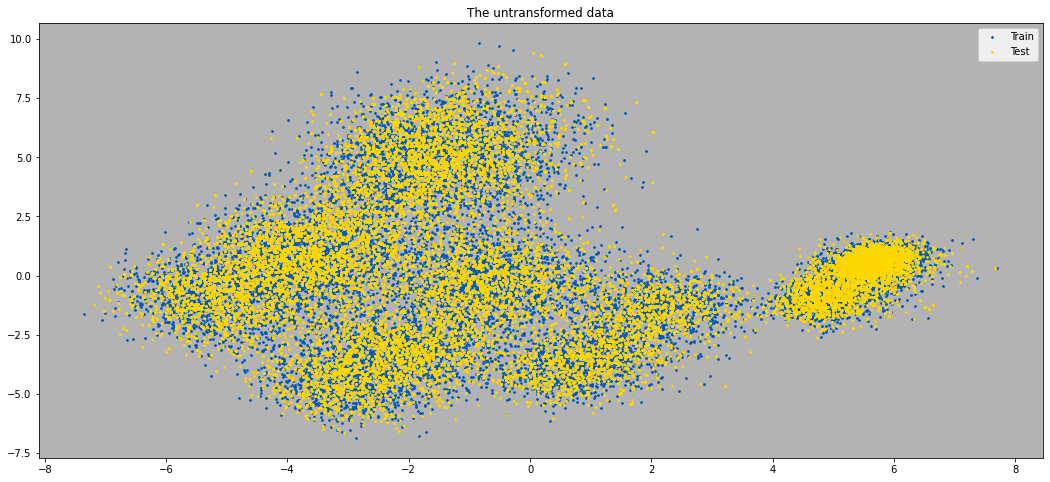

In [9]:
def plot_pca(tr, te, title):
    pca = PCA(n_components=2)
    tr_p = pca.fit_transform(tr)
    te_p = pca.transform(te)

    plt.figure(figsize=(18, 8))
    plt.gca().set_facecolor((0.7, 0.7, 0.7))
    #plt.scatter(tr_p[:,0], tr_p[:,1], s=3, c=y_tr, cmap='tab10', label='Training')
    plt.scatter(tr_p[:,0], tr_p[:,1], s=3, c='#0057b8', label='Train') # train: blue
    plt.scatter(te_p[:,0], te_p[:,1], s=3, c='#ffd700', label='Test') # test: yellow
    plt.legend()
    plt.title(title)
    plt.show()
    
plot_pca(Z_tr, Z_te, 'The untransformed data')

In [10]:
%%time
# Convert Z_tr and Z_te to arrays X_tr and X_te of shape (n_samples, 100)
def transform(Z):
    ll = [] # list of lists which will be converted to a 2d array
    for i in range(len(Z)):
        l = [] # list which will be converted to a row of the new 2d array
        for j in range(Z.shape[1]):
            for k in range(Z.iloc[i, j]): l.append(j)
        ll.append(l)
    return np.array(ll)

X_tr = transform(Z_tr)
X_te = transform(Z_te)
X_tr.shape, X_te.shape

CPU times: user 4min 50s, sys: 57.9 ms, total: 4min 51s
Wall time: 4min 51s


((15134, 100), (24911, 100))

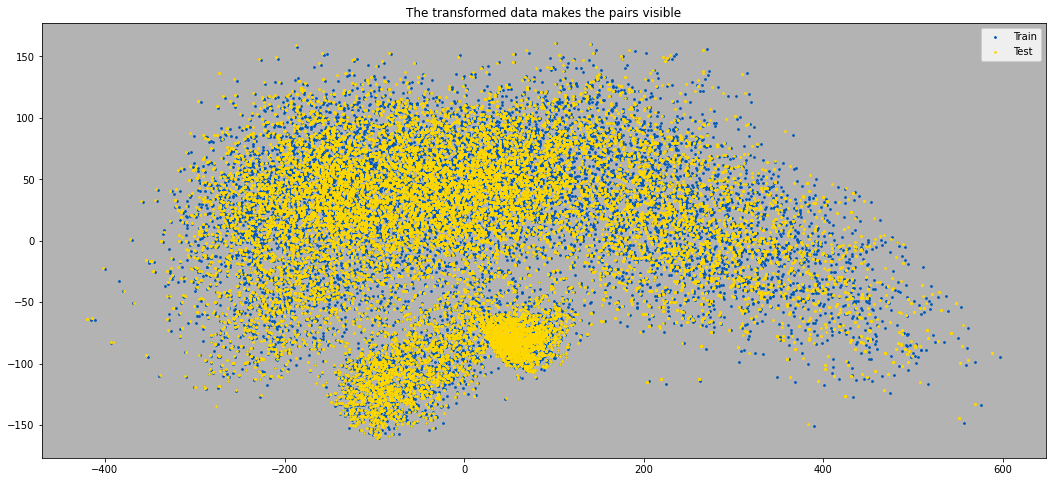

In [11]:
plot_pca(X_tr, X_te, 'The transformed data makes the pairs visible')


In [12]:
# Predict with RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=18, weights='distance',
                                p=1, outlier_label=-1, n_jobs=-1)
rnc.fit(X_tr, y_tr)
y_pred = rnc.predict(X_te)
print('Unique predictions:', np.unique(y_pred))
print('Frequencies:', np.unique(y_pred, return_counts=True)[1])
print('Samples:', len(y_pred))
print('Predicted samples:', 
      len(y_pred) - np.unique(y_pred, return_counts=True)[1][0])

Unique predictions: [-1  0  1  2  3  4  5  6  7  8  9]
Frequencies: [10826  1778   810   680   394  1782   432  1766  1965  2400  2078]
Samples: 24911
Predicted samples: 14085


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:669: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])


In [13]:
# Read the top public submission and merge it with our predictions
top_submission = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

test_df['target_num'] = le.transform(top_submission.target)
test_df.loc[(test_df.gcd == 10000), 'target_num'] = y_pred # can contain -1
test_df['target_num'] = np.where(test_df.target_num == -1,
                                 le.transform(top_submission.target),
                                 test_df.target_num)
test_df['target'] = le.inverse_transform(test_df.target_num.astype(int))
submission = test_df[['row_id', 'target']]
print('Modified:', (submission.target != top_submission.target).sum())
submission.to_csv('submission_radiusneighbors.csv', index=False)
submission

Modified: 11685


,row_id,target
0,200000,Streptococcus_pneumoniae
1,200001,Streptococcus_pneumoniae
2,200002,Streptococcus_pneumoniae
3,200003,Streptococcus_pneumoniae
4,200004,Streptococcus_pneumoniae
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Streptococcus_pneumoniae
99998,299998,Bacteroides_fragilis
